In [14]:
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt
# import soundfile as sf

# # Load the audio file
# file_path = 'song.wav'
# y, sr = librosa.load(file_path)

# # Display the waveform before noise reduction
# plt.figure(figsize=(12, 4))
# librosa.display.waveshow(y, sr=sr)
# plt.title('Waveform before Noise Reduction')
# plt.show()

# # Apply noise reduction
# y_preemphasized = librosa.effects.preemphasis(y)
# y_reduced = librosa.effects.trim(y_preemphasized)[0]

# # Display the waveform after noise reduction
# plt.figure(figsize=(12, 4))
# librosa.display.waveshow(y_reduced, sr=sr)
# plt.title('Waveform after Noise Reduction')
# plt.show()

# # Save the cleaned audio using soundfile
# sf.write('cleaned_audio.wav', y_reduced, sr)


In [15]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [17]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:

# Load the audio file
file_path = 'noise1_phase1.wav'
data, rate = librosa.load(file_path)
data = data

In [19]:
IPython.display.Audio(data=data, rate=rate)

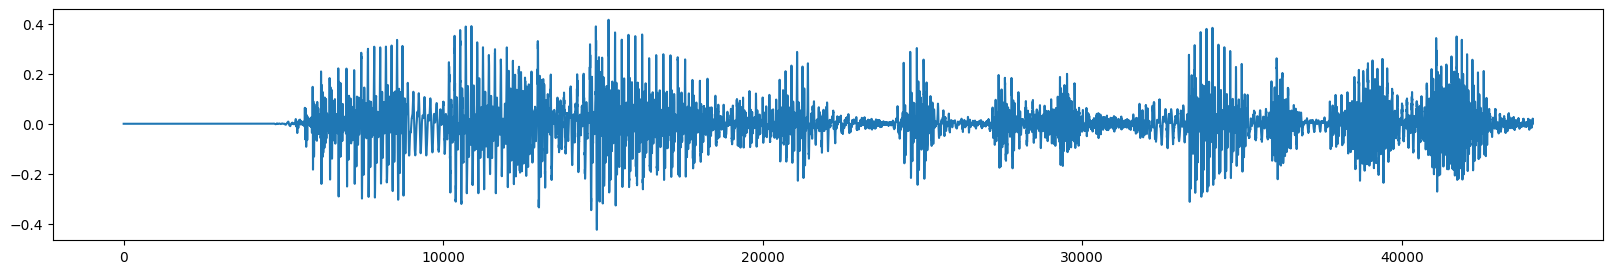

In [20]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [29]:
reduced_noise = nr.reduce_noise(y = data, sr=rate , n_std_thresh_stationary=1.05 , stationary=True)

In [30]:
IPython.display.Audio(data=reduced_noise, rate=rate)

In [24]:

# reduced_noise = nr.reduce_noise(y = data, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

In [25]:
# IPython.display.Audio(data=reduced_noise, rate=rate)

In [26]:
import pandas as pd
import numpy as np
import random
excel_file_path = "echo-ha/noise_314.xlsx"

# # Read the Excel file into a pandas DataFrame
df= pd.read_excel(excel_file_path)
df = df.values
df = df.flatten()
df = df.T
signal = (df).astype(np.int16)
from scipy.io.wavfile import write
write("noise1.wav", 11025, signal)